# ResNet-Lie-Detector

---

Javier Fuenzalida

Tomas Herrera

---

Notebook para detectar mentiras utilizando una red neuronal tipo ResNet y entrenada con el set de datos:
Micro Expression Dataset for Lie Detection (https://www.kaggle.com/datasets/devvratmathur/micro-expression-dataset-for-lie-detection)



## Importacion y configuracion de librerias

In [13]:
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory,load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
import os


In [14]:
os.makedirs('models', exist_ok=True)

In [15]:
np.random.seed(65)
tf.random.set_seed(65)

## Importacion del Dataset

In [16]:
path = kagglehub.dataset_download("devvratmathur/micro-expression-dataset-for-lie-detection")

print("Path to dataset files:", path)

Path to dataset files: /home/jfuenzalida/.cache/kagglehub/datasets/devvratmathur/micro-expression-dataset-for-lie-detection/versions/3


In [17]:
train_path = path + "/Train/Train"
test_path = path + "/Test/Test"

print("Path to train files:", train_path)
print("Path to test files:", test_path)

Path to train files: /home/jfuenzalida/.cache/kagglehub/datasets/devvratmathur/micro-expression-dataset-for-lie-detection/versions/3/Train/Train
Path to test files: /home/jfuenzalida/.cache/kagglehub/datasets/devvratmathur/micro-expression-dataset-for-lie-detection/versions/3/Test/Test


In [18]:
height = 128
width = 128
batch_size = 32

In [19]:
trainSet = image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(height, width),
    batch_size=batch_size,
    shuffle=True,
    seed=65
)

Found 12694 files belonging to 2 classes.


In [20]:
testSet = image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(height, width),
    batch_size=batch_size,
    shuffle=True,
    seed=65
)

Found 5838 files belonging to 2 classes.


In [21]:
print(testSet.class_names)
print(trainSet.class_names)

['Lie', 'Truth']
['Lie', 'Truth']


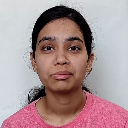

In [22]:
for images, labels in trainSet.take(1):
  for i in range(images.shape[0]):
    img_loaded = array_to_img(images[i])  # Convert the tensor to a PIL Image
    display(img_loaded)
    break  # Display only the first image of the batch
  break

In [23]:
img_data = img_to_array(img_loaded)
img_data.shape

(128, 128, 3)

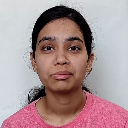

In [24]:
for imges, labels in testSet.take(1):
  for i in range(images.shape[0]):
    img_loaded = array_to_img(images[i])  # Convert the tensor to a PIL Image
    display(img_loaded)
    break  # Display only the first image of the batch
  break

In [25]:
img_data = img_to_array(img_loaded)
img_data.shape

(128, 128, 3)